# PyZeta Teaser

This *teaser* notebook shows some of the very basic functionality of **PyZeta** in terms of the
scripting API. No real effort was made to follow best practices with respect to **PyZeta**-based
applications in order to arrive at some interesting plots as fast as possible.

The goal here is to wet your appetit to start your own resonance adventure!

## Imports

First some basic imports are needed - some of these would be abstracted away when programming
with the highest-level enduser API.

In [24]:
%pip uninstall pyzeal -y
%pip uninstall pyzeta -y
%pip uninstall ptest -y


Found existing installation: PyZEAL 1.0.0
Uninstalling PyZEAL-1.0.0:
  Successfully uninstalled PyZEAL-1.0.0
Note: you may need to restart the kernel to use updated packages.
Found existing installation: PyZeta 0.1.1
Uninstalling PyZeta-0.1.1:
  Successfully uninstalled PyZeta-0.1.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip install pyzeal
%pip install pytest
%pip install pyzeta

  Using cached PyZEAL-1.0.0-py3-none-any.whl.metadata (49 kB)
Using cached PyZEAL-1.0.0-py3-none-any.whl (132 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached PyZeta-0.1.1-py3-none-any.whl.metadata (49 kB)
Using cached PyZeta-0.1.1-py3-none-any.whl (154 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Updated the following python files, i.e. replaced np.infty by np.inf 

In [37]:
import pyzeta.geometry.geodesic
print(pyzeta.geometry.geodesic.__file__)

import pyzeta.geometry.sl2r
print(pyzeta.geometry.sl2r.__file__)

import pyzeta.geometry.visuals
print(pyzeta.geometry.visuals.__file__)

import pyzeta.geometry.helpers
print(pyzeta.geometry.helpers.__file__)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyzeta/geometry/geodesic.py
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyzeta/geometry/sl2r.py
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyzeta/geometry/visuals.py
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyzeta/geometry/helpers.py


In [35]:
from colorsys import hls_to_rgb

import numpy as np
import matplotlib.pyplot as plt

from pyzeal.rootfinders.rootfinder import RootFinder
from pyzeal.pyzeal_types.algorithm_types import AlgorithmTypes
from pyzeal.pyzeal_types.estimator_types import EstimatorTypes
from pyzeal.settings.json_settings_service import JSONSettingsService

from pyzeta.core.pyzeta_types.function_systems import FunctionSystemType
from pyzeta.core.pyzeta_types.map_systems import MapSystemType

from pyzeta.framework.initialization.initialization_handler import (
    PyZetaInitializationHandler,
)
from pyzeta.core.zetas.selberg_zeta import SelbergZeta
from pyzeta.core.pyzeta_types.integrals import OrbitIntegralType
from pyzeta.core.zetas.wzeta import WeightedZeta
from pyzeta.core.distributions.ruelle_distribution import RuelleDistribution

PyZetaInitializationHandler.initPyZetaServices()
# deactivate PyZEAL progress bar
JSONSettingsService().verbose = False


## Hyperbolic Cylinder Resonances

We begin by calculating some quantum resonances for the Schottky and flow adapted hyperbolic
cylinders. These resonances are theoretically known to be located at
\begin{equation}
-\mathbb{N}_0 + \frac{2\pi\mathrm{i}}{\ell} \mathbb{Z}
\end{equation}
for $\ell$ the width of the closed geodesic around the cylinder waist. Their respective multiplicities
are always $2$. Both representations should of course yield these values!

resonance=1.885j --> order=2
resonance=-0j --> order=2
resonance=0.628j --> order=2
resonance=1.256j --> order=2
resonance=1.885j --> order=2
resonance=-0j --> order=2
resonance=0.628j --> order=2
resonance=1.256j --> order=2


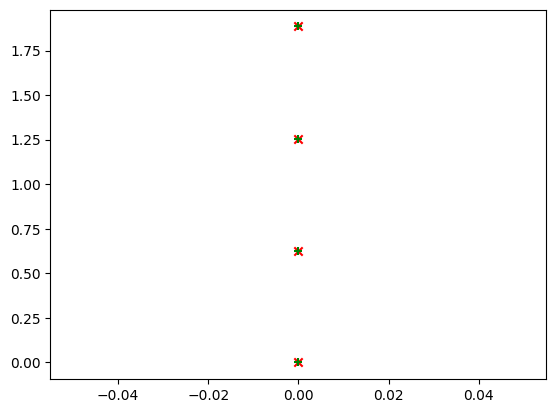

In [2]:
initArgs = {"funnelWidth": 10.0, "rotate": False}
width = initArgs["funnelWidth"]
nMax = 10

for systemType, color, marker in zip(
    [
        FunctionSystemType.FLOW_CYLINDER,
        FunctionSystemType.HYPERBOLIC_CYLINDER,
    ],
    ["red", "green"],
    ["x", "+"],
):
    zeta = SelbergZeta(
        functionSystem=systemType,
        systemInitArgs=initArgs,
    )

    finder = RootFinder(
        f=lambda s: zeta(s, nMax=nMax),
        algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
        estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
    )

    finder.calculateRoots(
        reRan=(-0.4, 0.5), imRan=(-0.1, 2.2), precision=(3, 2)
    )
    for res, order in zip(finder.roots, finder.orders):
        print(f"resonance={res} --> order={order}")

    plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)


Next we repeat the experiment above but now for classical Pollicott-Ruelle resonances calculated from
weighted dynamical determinants with constant weight. From the classical-quantum
correspondence we know that these should coincide with the quantum resonances after a shift by $-1$.

In [38]:
# calculate classical resonances for Schottky and flow adapted cylinders
initArgs = {"funnelWidth": 10.0}
width = initArgs["funnelWidth"]
nMax = 10

for systemType, color, marker in zip(
    [
        MapSystemType.HYPERBOLIC_CYLINDER,
        MapSystemType.FLOW_CYLINDER,
    ],
    ["red", "green"],
    ["x", "+"],
):
    wzeta = WeightedZeta(
        mapSystem=systemType,
        systemInitArgs=initArgs,
        integralType=OrbitIntegralType.CONSTANT,
        integralInitArgs={},
    )

    finder = RootFinder(
        f=lambda s: wzeta(s, nMax=nMax),
        algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
        estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
    )

    finder.calculateRoots(
        reRan=(-1.4, -0.5), imRan=(-0.1, 2.2), precision=(3, 2)
    )
    for res, order in zip(finder.roots, finder.orders):
        print(f"resonance={res} --> order={order}")

    plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)


AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

## Funneled Torus Resonances

We finish our resonance demonstrations with the first couple of resonances for the funneled torus.
These are already rather complicated and not known exactly but there exist previous numerical
investigations in the literature with which we may verify our calculations.

Again both quantum and classical resonances are calculated and their correspondence can be used as
a consistency check between dynamical determinants and Selberg's zeta function.

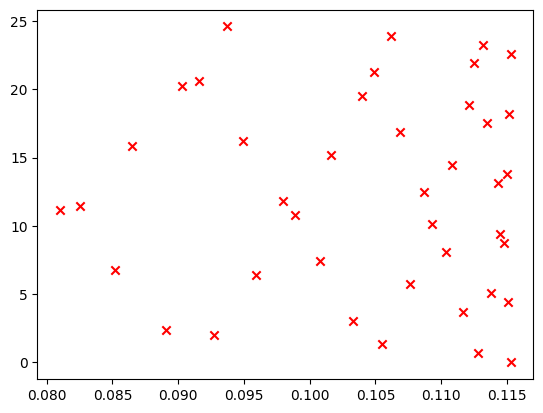

In [4]:
# calculate quantum resonances for non-geometric torus coordinate choice
initArgs = {"outerLen": 10.0, "innerLen": 10.0, "angle": np.pi / 2.0}
nMax = 6

systemType = FunctionSystemType.FUNNEL_TORUS
color = "red"
marker = "x"

zeta = SelbergZeta(
    functionSystem=systemType,
    systemInitArgs=initArgs,
)

finder = RootFinder(
    f=lambda s: zeta(s, nMax=nMax),
    algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
    estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
)

finder.calculateRoots(reRan=(0.08, 0.12), imRan=(-0.0, 25.0), precision=(3, 2))

plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)

In [5]:
# calculate classical resonances for non-geometric torus coordinate choice
initArgs = {"outerLen": 10.0, "innerLen": 10.0, "angle": np.pi / 2.0}
nMax = 6

systemType = MapSystemType.FUNNEL_TORUS
color = "red"
marker = "x"

zeta = WeightedZeta(
    mapSystem=systemType,
    systemInitArgs=initArgs,
    integralType=OrbitIntegralType.CONSTANT,
    integralInitArgs={},
)

finder = RootFinder(
    f=lambda s: zeta(s, nMax=nMax),
    algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
    estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
)

finder.calculateRoots(
    reRan=(-0.92, -0.88), imRan=(-0.0, 25.0), precision=(3, 2)
)

plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)

AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

## Hyperbolic Cylinder Ruelle Distributions

The genuinely new technique of **PyZeta** is the investigation of invariant Ruelle distributions
via weighted zeta functions. The upcoming plots show such distributions both for the Schottky and
the flow-adapted hyperbolic cylinder. These variants are calculated and visualized with two
different methods namely restriction to the canonical Poincare section and pushforward to the
canonical fundamental domain.

AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

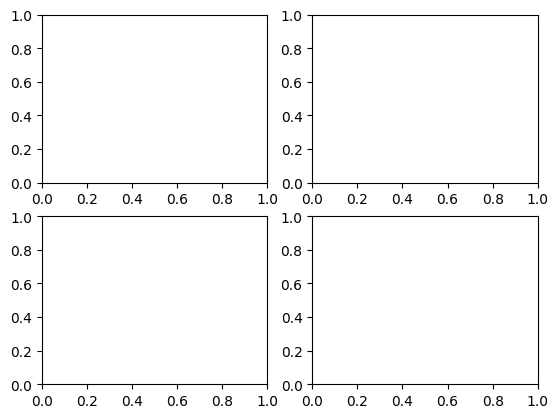

In [9]:
# calculate Ruelle dist at delta-1 for Schottky and flow-adapted systems
from typing import Final, List, Optional, Tuple, Type
FIRST_RESONANCE: Final[complex] = -1.0 + 0.0j

_, axs = plt.subplots(2, 2)

for i, integralType in enumerate(
    [OrbitIntegralType.POINCARE, OrbitIntegralType.FUNDAMENTAL_DOMAIN]
):
    for j, systemType in enumerate(
        [MapSystemType.HYPERBOLIC_CYLINDER, MapSystemType.FLOW_CYLINDER]
    ):
        ruelle = RuelleDistribution(
            systemType,
            systemInitArgs={"funnelWidth": 5.0},
            integralType=integralType,
            sigma=5e-2,
            numSupportPts=600,
        )

        firstDistribution = ruelle(
            np.array([FIRST_RESONANCE], dtype=np.complex128), nMax=7
        )[0]
        axs[j][i].imshow(
            np.abs(firstDistribution), cmap="Reds", origin="lower"
        )
        axs[j][i].set_xticks([])
        axs[j][i].set_yticks([])

plt.show()


The results are quite homogeneous due to the decently large resolution $\sigma$ as well as the
associated resonance being the first at $\lambda_0 = -1$. Nevertheless both plots show clearly
the support within the fundamental intervals of the underlying systems.

## Funneled Torus Ruelle Distributions

Finally we complement the invariant Ruelle distributions of the hyperbolic cylinder with similar examples
but now for the funneled torus.

AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

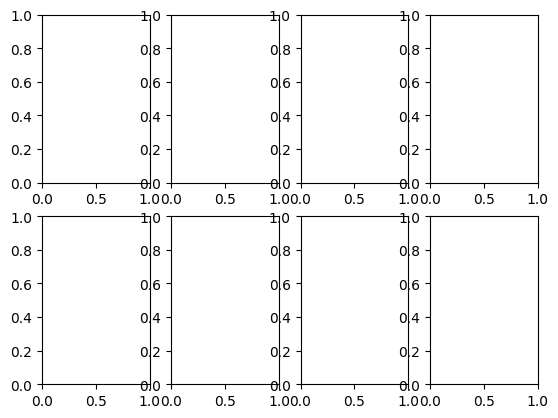

In [10]:
# calculate Ruelle distribution beyond delta-1 for conventional torus params
HIGHER_RESONANCE: Final[complex] = -0.8847
systemType = MapSystemType.FUNNEL_TORUS
systemInitArgs = {"outerLen": 10.0, "innerLen": 10.0, "angle": np.pi / 2.00}
N_MAX = 7

poincareArgs = {
    "sigma": 1e-3,
    "refinementLevel": 0,
    "minusIndices": [1, 2, 3],
    "plusIndices": [0, 1],
}
fundamentalDomainArgs = {
    "sigma": 6e-2,
    "refinementLevel": 0,
}

_, (axs1, axs2) = plt.subplots(2, 4)

for i, axs in enumerate((axs1, axs2)):
    for j, (integralType, args) in enumerate(
        zip(
            [OrbitIntegralType.POINCARE, OrbitIntegralType.FUNDAMENTAL_DOMAIN],
            [poincareArgs, fundamentalDomainArgs],
        )
    ):
        ruelle = RuelleDistribution(
            systemType,
            systemInitArgs=systemInitArgs,
            integralType=integralType,
            numSupportPts=300,
            **args,
        )

        higherDistribution = ruelle(
            np.array([HIGHER_RESONANCE], dtype=np.complex128), nMax=N_MAX + i
        )[0]

        # create a phase-lightness representation of the distribution
        absoluteValue = np.abs(higherDistribution)
        argument = np.angle(higherDistribution)
        hue = (argument + np.pi) / (2 * np.pi) + 0.5
        lightness = 1.0 - 1.0 / (1.0 + absoluteValue**0.2)
        saturation = 0.8

        rgb = np.array(np.vectorize(hls_to_rgb)(hue, lightness, saturation))
        rgb = rgb.swapaxes(0, 2).swapaxes(0, 1)

        axs[2 * j].imshow(np.abs(1.0 - rgb), cmap="Reds", origin="lower")
        axs[2 * j].set_xticks([])
        axs[2 * j].set_yticks([])

        axs[2 * j + 1].imshow(
            np.abs(higherDistribution), cmap="Reds", origin="lower"
        )
        axs[2 * j + 1].set_xticks([])
        axs[2 * j + 1].set_yticks([])

plt.show()

AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

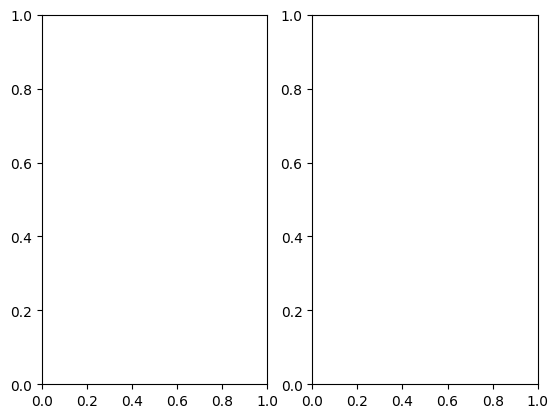

In [11]:
# calculate Ruelle distribution beyond delta-1 for conventional torus params
HIGHER_RESONANCE: Final[complex] = -0.9998 + 9.12j
systemType = MapSystemType.FUNNEL_TORUS
systemInitArgs = {"outerLen": 10.0, "innerLen": 10.0, "angle": np.pi / 2.00}
integralType = OrbitIntegralType.POINCARE
N_MAX = 6

poincareArgs = {
    "sigma": 2e-3,
    "refinementLevel": 0,
    "minusIndices": [1, 2, 3],
    "plusIndices": [0, 1],
}

_, (axs1, axs2) = plt.subplots(1, 2)

ruelle = RuelleDistribution(
    systemType,
    systemInitArgs=systemInitArgs,
    integralType=integralType,
    numSupportPts=300,
    **poincareArgs,
)

higherDistribution = ruelle(
    np.array([HIGHER_RESONANCE], dtype=np.complex128), nMax=N_MAX
)[0]

# create a phase-lightness representation of the distribution
absoluteValue = np.abs(higherDistribution)
argument = np.angle(higherDistribution)
hue = (argument + np.pi) / (2 * np.pi) + 0.5
lightness = 1.0 - 1.0 / (1.0 + absoluteValue**0.2)
saturation = 0.8

rgb = np.array(np.vectorize(hls_to_rgb)(hue, lightness, saturation))
rgb = rgb.swapaxes(0, 2).swapaxes(0, 1)

axs1.imshow(np.abs(1.0 - rgb), cmap="Reds", origin="lower")
axs1.set_xticks([])
axs1.set_yticks([])

axs2.imshow(np.abs(higherDistribution), cmap="Reds", origin="lower")
axs2.set_xticks([])
axs2.set_yticks([])

plt.show()

We calculated and plotted the same pair of Poincare/fundamental domain approximations for
two subsequent cutoff values $n_\mathrm{max}$ in the cycle expansion. This helps us verify
that the distributions have indeed converged which beyond the first resonance is often
difficult to make work without symmetry reduction. This is exactly the case for the fundamental
domain variant in our second to last example which has just barely converged.

In practice it is much cleaner to verify convergence programmatically with one of the error
estimators of **PyZeta**.